In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sn
import scipy

In [3]:
runstats_df = pd.read_csv("logs/log13.csv")

In [4]:
normalized_times = runstats_df.WallTime / runstats_df.Instructions
runstats_df['NormalizedTimes'] = normalized_times
runstats_df['StraightLineCost'] = runstats_df.WallTime - runstats_df.SolverTime
runstats_df = runstats_df.loc[:, (runstats_df != 0).any(axis=0)]

In [5]:
runstats_df

,Instructions,FullBranches,PartialBranches,NumBranches,UserTime,MallocUsage,NumQueries,NumQueryConstructs,WallTime,CoveredInstructions,...,PtrToInts,BitCasts,ICmps,PHIs,Selects,Calls,Shls,AShrs,NormalizedTimes,StraightLineCost
0,164040,58,189,1406,951770.0,45920872,17,147,752470.0,4048,...,109,142,12044,1129,1,5405,25,6,4.587113,519413.0
1,164075,58,189,1406,885300.0,45921000,20,176,645435.0,4048,...,109,142,12049,1129,1,5405,25,6,3.933780,375576.0
2,164053,58,189,1406,902207.0,45921720,18,154,596993.0,4048,...,109,142,12046,1129,1,5405,25,6,3.639025,327711.0
3,166279,58,190,1406,913449.0,45928152,30,347,696049.0,4071,...,121,148,12228,1137,1,5573,25,6,4.186031,339655.0
4,164075,58,189,1406,906284.0,45920680,20,176,610798.0,4048,...,109,142,12049,1129,1,5405,25,6,3.722676,327967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,164111,58,189,1406,974271.0,45924080,23,209,634068.0,4048,...,109,142,12053,1129,1,5405,25,6,3.863653,346613.0
196,164138,58,190,1406,860882.0,45920976,19,155,613689.0,4067,...,109,142,12052,1133,1,5405,25,6,3.738860,337729.0
197,169144,64,188,1406,984285.0,45929024,31,352,768091.0,4104,...,127,160,12469,1141,1,5718,25,6,4.541048,398598.0
198,163768,58,186,1406,853265.0,45905704,14,110,545242.0,3997,...,108,142,12022,1128,1,5367,25,6,3.329356,334982.0


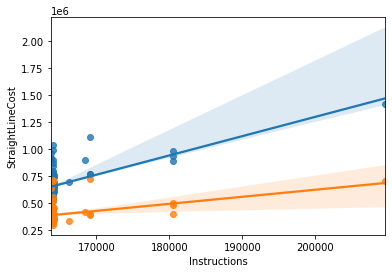

In [7]:
sn.regplot(runstats_df.Instructions, runstats_df.WallTime)
sn.regplot(runstats_df.Instructions, runstats_df.StraightLineCost)

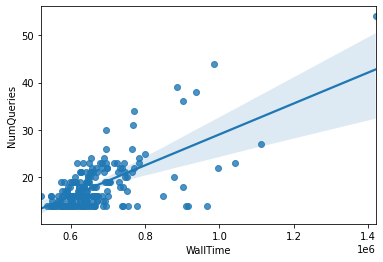

In [68]:
sn.regplot(runstats_df.WallTime, runstats_df.NumQueries)

In [40]:
corr_vector = (runstats_df.corr())
plt.figure(figsize = (20,1))
corr_vector = corr_vector.NormalizedTimes
corr_vector

Instructions             0.464674
FullBranches             0.452523
PartialBranches          0.067123
NumBranches                   NaN
UserTime                 0.377585
MallocUsage              0.355193
NumQueries               0.571304
NumQueryConstructs       0.576586
WallTime                 0.979964
CoveredInstructions      0.303908
UncoveredInstructions   -0.303908
QueryTime                0.774123
SolverTime               0.773175
CexCacheTime             0.773891
ForkTime                 0.559275
QueryCexCacheMisses      0.571304
QueryCexCacheHits             NaN
Breaks                   0.465531
Returns                  0.463986
Switchs                  0.468461
Adds                     0.454814
Subs                     0.485723
Muls                     0.326896
UDivs                    0.326896
URems                         NaN
Ands                     0.461902
Ors                      0.464106
Xors                          NaN
Allocas                  0.467591
Loads         

<Figure size 1440x72 with 0 Axes>

Correlation coefficient: 0.37550600386643657, P-value: 4.2773256909180096e-08


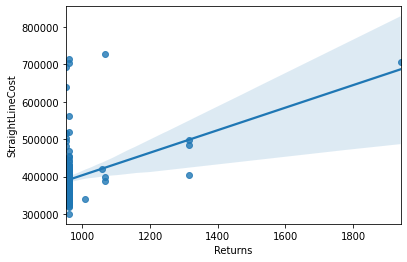

Correlation coefficient: 0.3726405228928673, P-value: 5.513923663995779e-08


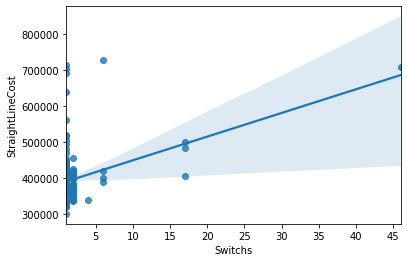

Correlation coefficient: 0.37997549961293464, P-value: 2.8642237300029425e-08


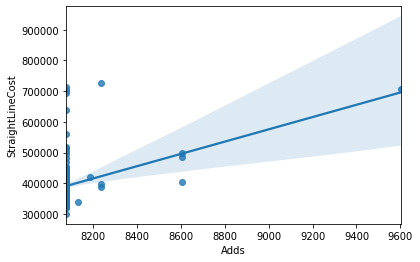

Correlation coefficient: 0.08144259270001372, P-value: 0.2516055341854139


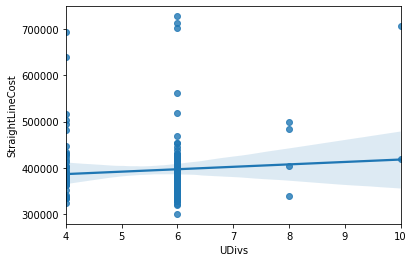

In [8]:
plot_types = ['Returns', 'Switchs', 'Adds', 'UDivs']
for x in plot_types:
    plt.show()
    sn.regplot(runstats_df[x], runstats_df.NormalizedTimes)
    cc, p = scipy.stats.pearsonr(runstats_df[x], runstats_df.NormalizedTimes)
    print(f"Correlation coefficient: {cc}, P-value: {p}")


Correlation coefficient: 0.37550600386643657, P-value: 4.2773256909180096e-08


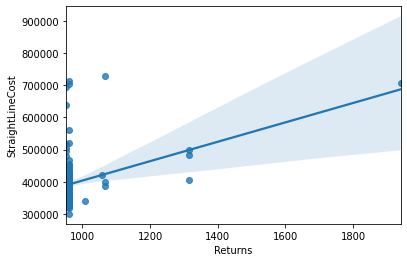

Correlation coefficient: 0.3726405228928673, P-value: 5.513923663995779e-08


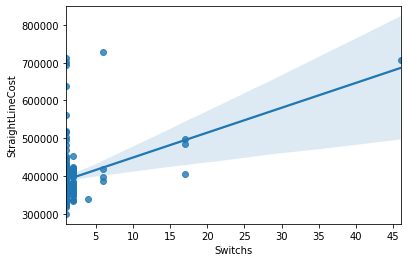

Correlation coefficient: 0.37997549961293464, P-value: 2.8642237300029425e-08


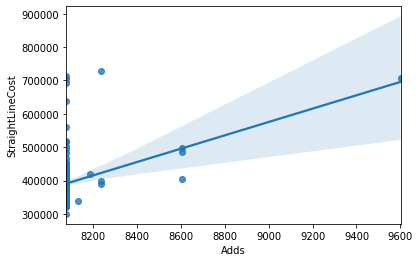

Correlation coefficient: 0.08144259270001372, P-value: 0.2516055341854139


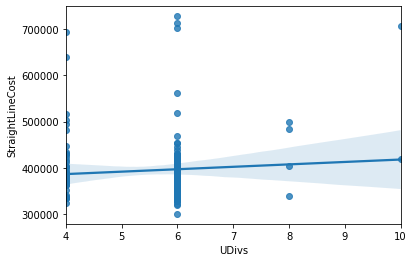

In [9]:
plot_types = ['Returns', 'Switchs', 'Adds', 'UDivs']
for x in plot_types:
    plt.show()
    sn.regplot(runstats_df[x], runstats_df.StraightLineCost)
    cc, p = scipy.stats.pearsonr(runstats_df[x], runstats_df.StraightLineCost)
    print(f"Correlation coefficient: {cc}, P-value: {p}")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46398d9ac8>]],
      dtype=object)

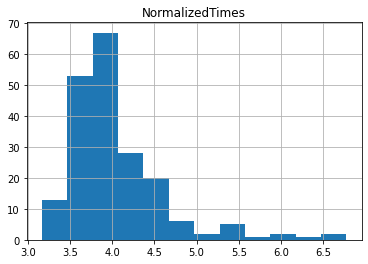

In [7]:
runstats_df.hist(bins=12, column='NormalizedTimes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4636c94198>]],
      dtype=object)

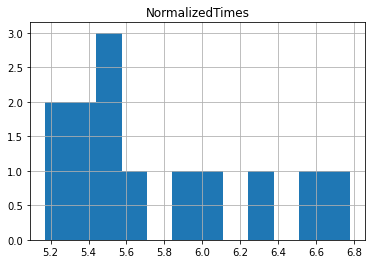

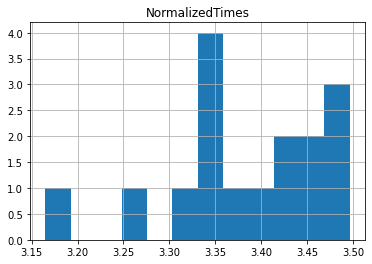

In [16]:
high_ratio = runstats_df.loc[(runstats_df['NormalizedTimes'] > 5.0)]
low_ratio = runstats_df.loc[(runstats_df['NormalizedTimes'] < 3.5)]
high_ratio.hist(bins=12, column='NormalizedTimes')
low_ratio.hist(bins=12, column='NormalizedTimes')

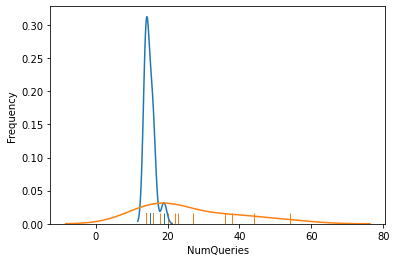

In [23]:
param = 'NumQueries'
sn.distplot(low_ratio[[param]], hist=False, rug=True)
sn.distplot(high_ratio[[param]], hist=False, rug=True)
plt.xlabel(param)
plt.ylabel("Frequency")

plt.show()

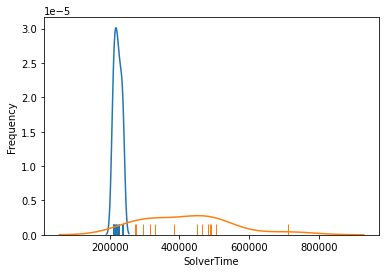

In [24]:
param = 'SolverTime'
sn.distplot(low_ratio[[param]], hist=False, rug=True)
sn.distplot(high_ratio[[param]], hist=False, rug=True)
plt.xlabel(param)
plt.ylabel("Frequency")

plt.show()

/home/igandhi/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


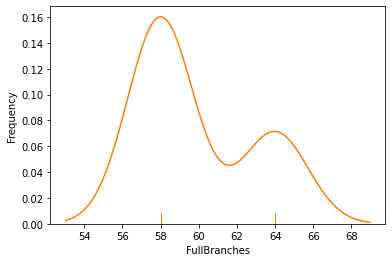

In [25]:
param = 'FullBranches'
sn.distplot(low_ratio[[param]], hist=False, rug=True)
sn.distplot(high_ratio[[param]], hist=False, rug=True)
plt.xlabel(param)
plt.ylabel("Frequency")

plt.show()

low: 0.39949723238149365
high: 0.423597965538428


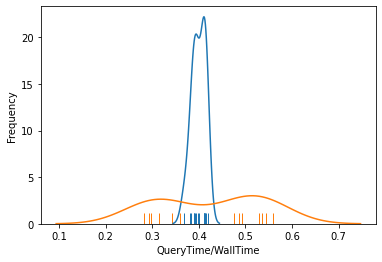

In [62]:
param = 'QueryTime'
WallTime = 'WallTime'
sn.distplot(low_ratio[param]/low_ratio.WallTime, hist=False, rug=True)
sn.distplot(high_ratio[param]/high_ratio.WallTime, hist=False, rug=True)
plt.xlabel(param+'/WallTime')
plt.ylabel("Frequency")
print(f"low: {(low_ratio[param]/low_ratio.WallTime).mean()}")
print(f"high: {(high_ratio[param]/high_ratio.WallTime).mean()}")

plt.show()

low: 0.40028953317885085
high: 0.42470974370478287


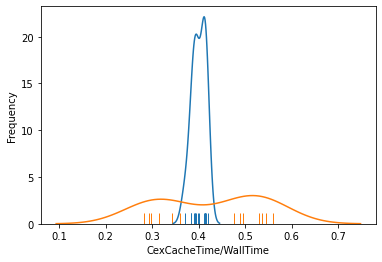

In [63]:
param = 'CexCacheTime'
sn.distplot(low_ratio[param]/low_ratio.WallTime, hist=False, rug=True)
sn.distplot(high_ratio[param]/high_ratio.WallTime, hist=False, rug=True)
plt.xlabel(param+'/WallTime')
plt.ylabel("Frequency")
print(f"low: {(low_ratio[param]/low_ratio.WallTime).mean()}")
print(f"high: {(high_ratio[param]/high_ratio.WallTime).mean()}")

plt.show()

low: 0.00046546240731208075
high: 0.0008378841596986418


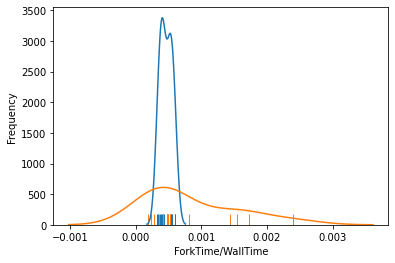

In [64]:
param = 'ForkTime'
sn.distplot(low_ratio[param]/low_ratio.WallTime, hist=False, rug=True)
sn.distplot(high_ratio[param]/high_ratio.WallTime, hist=False, rug=True)
plt.xlabel(param+'/WallTime')
plt.ylabel("Frequency")
print(f"low: {(low_ratio[param]/low_ratio.WallTime).mean()}")
print(f"high: {(high_ratio[param]/high_ratio.WallTime).mean()}")

plt.show()

low: 0.40180627346168385
high: 0.42729078081023025


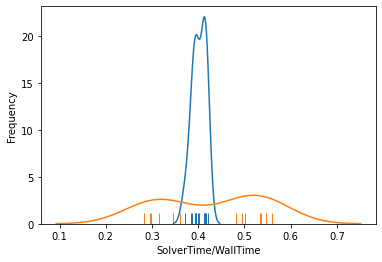

In [65]:
param = 'SolverTime'
sn.distplot(low_ratio[param]/low_ratio.WallTime, hist=False, rug=True)
sn.distplot(high_ratio[param]/high_ratio.WallTime, hist=False, rug=True)
plt.xlabel(param+'/WallTime')
plt.ylabel("Frequency")
print(f"low: {(low_ratio[param]/low_ratio.WallTime).mean()}")
print(f"high: {(high_ratio[param]/high_ratio.WallTime).mean()}")
plt.show()